Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4683 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1559 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1242 - accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1083 - accuracy: 0.9768
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1159 - accuracy: 0.9728
Epoch 1/5
1875/1875 [=======

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3296 - accuracy: 0.9046
Epoch 2/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.1663 - accuracy: 0.9511

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1663 - accuracy: 0.9511
Epoch 3/5
1863/1875 [============================>.] - ETA: 0s - loss: 0.1303 - accuracy: 0.9606

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1302 - accuracy: 0.9606
Epoch 4/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.1089 - accuracy: 0.9669

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1088 - accuracy: 0.9669
Epoch 5/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.0970 - accuracy: 0.9706

313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9751


[0.0800786092877388, 0.9750999808311462]

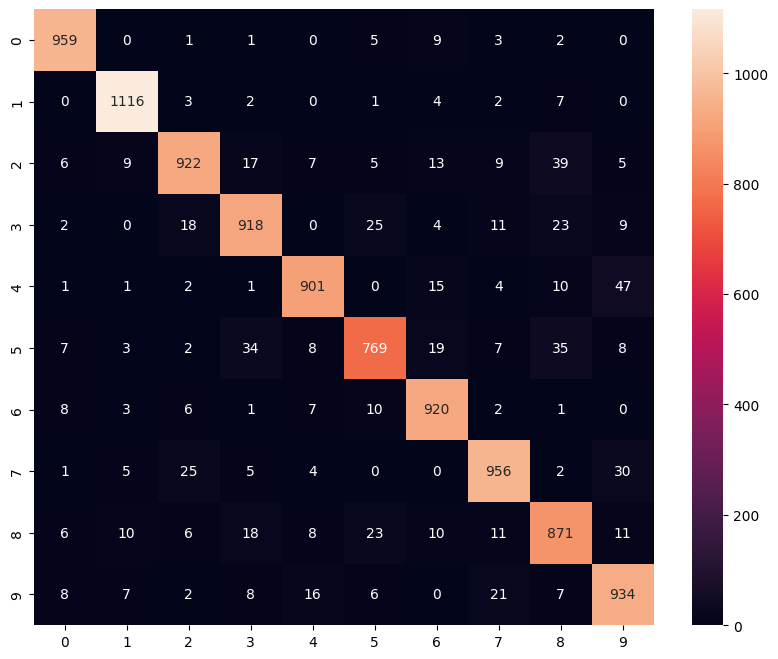

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import seaborn as sns

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train / 255
X_test = X_test / 255

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flat, y_train, epochs=5)

model.evaluate(X_test_flat, y_test)

y_pred = model.predict(X_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')

model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train_flat, y_train, epochs=5)

model1.evaluate(X_test_flat, y_test)

model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train_flat, y_train, epochs=5)

model2.evaluate(X_test_flat, y_test)

model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    Dropout(0.25),
    keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train_flat, y_train, epochs=5)

model3.evaluate(X_test_flat, y_test)

model4 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    Dropout(0.25),
    keras.layers.Dense(10, activation='sigmoid')
])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_acc', patience=2)

model4.fit(X_train_flat, y_train, epochs=5, callbacks=[early_stopping])

model4.evaluate(X_test_flat, y_test)